In [1]:
using Plots
gr()

Plots.GRBackend()

Solve for $\theta$
$$y = X\theta$$

**Solution 1**:
$$ \theta = X^{-1}y $$
Only works for square X which makes it useless in practice.

**Solution 2**:
$$ \theta = (X^TX)^{-1}X^Ty $$

This can be derived by:
$$ X\theta = y $$
$$ X^TX\theta = X^Ty $$
$$ \theta = (X^TX)^{-1}X^Ty $$

$ (X^TX)^{-1}X^T $ is equivalent to the Moore-Penrose pseudo-inverse.
`pinv` from the LinearAlgebra module provides this. 

A better "machine learning" proof by minimising the MSE cost function

$$
\begin{align}
J(\theta) & = ||y - X\theta||_2 \\
\nabla_\theta J(\theta) & = \nabla_\theta\frac{1}{2}(X\theta - y)^T(X\theta - y)\\
& = \nabla_\theta\frac{1}{2}(\theta^TX^T - y^T)(X\theta - y)\\
& = \nabla_\theta\frac{1}{2}(\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta + y^Ty)\\
& = \nabla_\theta\frac{1}{2}(\theta^TX^TX\theta - 2\theta^TX^Ty + y^Ty)\\
& = \frac{1}{2}(2X^TX\theta - 2X^Ty)\\
& = X^TX\theta - X^Ty\\
X^TX\theta & = X^Ty\\
\theta & = (X^TX)^{-1}X^Ty
\end{align}
$$

Notes:
* $\theta^TX^Ty$ and $y^TX\theta$ are are transposes of each other. They are also scalar valued (check the dimensions), so we can just add them up.
* The $ \frac{1}{2} $ is just added for convenience later on.
* $\nabla_\theta$ means the matrix derivative with respect to $\theta$
* Matrix differentiation rules:
$$
\begin{align}
x^TB & \rightarrow B\\
x^Tb & \rightarrow b\\
x^Tx & \rightarrow 2x\\
x^TBx & \rightarrow 2Bx\\
\end{align}
$$

**Solution 3**

Using gradient descent. It's defined as
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$
This just means adjust $\theta$ with respect to how much error there was.

For linear regression, we have to find out the partial derivative of the cost function. We use the mean squared error.

Assuming there's only one training example

$$
\begin{align}
\frac{\partial}{\partial \theta_j}J(\theta) & = \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_\theta(x) - y)^2\\
& = 2 \cdot \frac{1}{2} (h_\theta - y) \frac{\partial}{\partial \theta_j} (h_\theta(x) - y)\\
& = (h_\theta - y) \frac{\partial}{\partial \theta_j} (\sum \theta x - y)\\
& = (h_\theta - y) \cdot x_j\\
\end{align}\\
$$

Plugging it into the gradient descent formula

$$ \theta_j := \theta_j - \alpha (h_\theta - y) \cdot x_j $$

For more than one training example

$$ \theta_j := \theta_j - \sum \alpha (h_\theta - y) \cdot x_j $$


Notes:
* Apply chain rule

In [78]:
using LinearAlgebra

function solution2(X, y)
    pinv(X) * y
end

function h(x, θ)
    x * θ
end

function solution3(X, y, α=0.01, tol=1e-10)
    θ = rand(size(X)[2])
    prev = θ
    diff = +Inf
    while diff > tol
        for i = 1:size(X)[1]
            θ += α * (y[i] - sum(h(X[i], θ))) .* X[i, :]
        end
        diff = sum((prev - θ) .^ 2)
        prev = θ
    end
    θ
end

function solution4(X, y)
end

solution4 (generic function with 1 method)

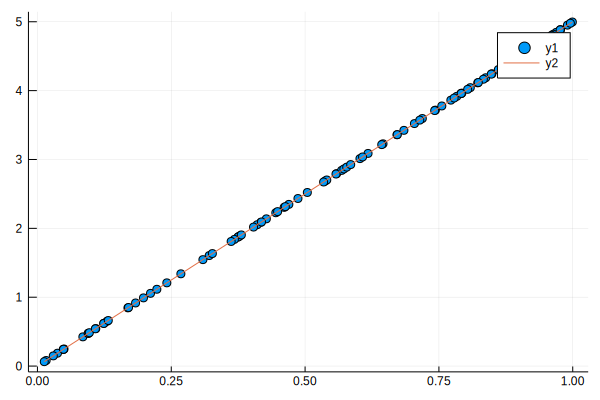

In [80]:
length = 100
numfeat = 1
f(x) = 5x
x = rand(length, numfeat)
y = f(x)
plot(x, y, seriestype=:scatter)
plot!(x, x .* solution2(x, y))

## solution2(x, y)